sq1 - Nutrient availability

sq2 - Nutrient retention capacity

sq3 - Rooting conditions

sq4 - Oxygen availability to roots

sq5 - Excess salts

sq6 - Toxicity

sq7 - Workability (constraining field management)

1: No or slight limitations

2: Moderate limitations

3: Sever limitations

4: Very severe limitations

5: Mainly non-soil

6: Permafrost area

7: Water bodies

In [158]:
## https://www.kaggle.com/cdminix/us-drought-meteorological-data
## The data came from kaggle.com - my target variables for this project were the 7 different soil quality indicators stated 
## above
np.random.seed(7)
import sklearn
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
import keras
from keras.models import Sequential
from keras.layers import Dense
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
pd.set_option('display.max_columns', None)
plt.style.use('ggplot')
df = pd.read_csv('soil_data.csv')
df.head()

,fips,lat,lon,elevation,slope1,slope2,slope3,slope4,slope5,slope6,slope7,slope8,aspectN,aspectE,aspectS,aspectW,aspectUnknown,WAT_LAND,NVG_LAND,URB_LAND,GRS_LAND,FOR_LAND,CULTRF_LAND,CULTIR_LAND,CULT_LAND,SQ1,SQ2,SQ3,SQ4,SQ5,SQ6,SQ7
0,1001,32.536382,-86.644490,63,0.0419,0.2788,0.2984,0.2497,0.1142,0.0170,0.0000,0.0,0.1033,0.1859,0.2003,0.1898,0.3207,0.9974,27.940498,0.2889,2.750274,10.714703,56.293411,1.014811,57.308224,1,1,1,1,1,1,2
1,1005,31.870670,-85.405456,146,0.0158,0.1868,0.5441,0.2424,0.0106,0.0003,0.0000,0.0,0.1415,0.2379,0.2183,0.1997,0.2026,0.0000,0.000000,0.4146,2.225602,22.952839,72.578804,1.828159,74.406960,3,2,1,1,1,1,1
2,1003,30.659218,-87.746067,52,0.0746,0.4370,0.4415,0.0469,0.0000,0.0000,0.0000,0.0,0.1168,0.1386,0.1048,0.1282,0.5116,0.0000,0.000000,3.5010,4.972456,28.685991,59.843639,2.996914,62.840553,3,2,1,2,1,1,1
3,1007,33.015893,-87.127148,93,0.0144,0.1617,0.3714,0.3493,0.0898,0.0134,0.0000,0.0,0.1971,0.1885,0.2279,0.2104,0.1761,0.0000,0.000000,0.2283,8.674664,89.172112,1.916593,0.008330,1.924924,3,2,1,1,1,1,1
4,1009,33.977448,-86.567246,198,0.0050,0.0872,0.2799,0.3576,0.1477,0.1037,0.0189,0.0,0.2569,0.1503,0.2028,0.2978,0.0922,0.0000,0.000000,1.0037,8.606856,88.470047,1.891909,0.027488,1.919397,3,2,1,1,1,1,1


In [159]:
## Looking at the standard deviation to judge the predicting power of each variable (the larger the number the more information
## within that variable)
df.describe()

,fips,lat,lon,elevation,slope1,slope2,slope3,slope4,slope5,slope6,slope7,slope8,aspectN,aspectE,aspectS,aspectW,aspectUnknown,WAT_LAND,NVG_LAND,URB_LAND,GRS_LAND,FOR_LAND,CULTRF_LAND,CULTIR_LAND,CULT_LAND,SQ1,SQ2,SQ3,SQ4,SQ5,SQ6,SQ7
count,3109.000000,3109.000000,3109.000000,3109.000000,3109.000000,3109.00000,3109.000000,3109.000000,3109.000000,3109.000000,3109.000000,3109.000000,3109.000000,3109.000000,3109.000000,3109.000000,3109.000000,3109.000000,3109.000000,3109.000000,3109.000000,3109.000000,3109.000000,3109.000000,3109.000000,3109.000000,3109.000000,3109.000000,3109.00000,3109.000000,3109.000000,3109.000000
mean,30678.538437,38.280052,-91.659790,427.624638,0.054973,0.29775,0.319991,0.155878,0.053409,0.065323,0.022223,0.009267,0.143749,0.168888,0.148392,0.165061,0.352723,2.850511,1.801451,2.670026,19.812154,39.296586,28.494804,3.504682,31.999486,1.830492,1.553554,1.282084,1.35735,1.146993,1.135092,1.284979
std,14986.018730,4.838634,11.485291,500.158880,0.089873,0.21595,0.167727,0.128400,0.073107,0.125526,0.064127,0.044933,0.078237,0.084105,0.082111,0.087843,0.272182,13.159247,7.971805,9.770693,25.447435,34.365530,31.839502,10.290893,33.099657,1.192219,1.021382,1.002508,1.03011,0.922308,0.914502,1.017465
min,1001.000000,25.601043,-124.211407,-1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,19045.000000,34.686818,-98.046842,132.000000,0.008300,0.10510,0.185800,0.040800,0.000500,0.000000,0.000000,0.000000,0.086200,0.109200,0.086300,0.101500,0.115600,0.000000,0.000000,0.104800,4.360057,4.552230,0.143526,0.045909,1.602227,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000
50%,29213.000000,38.328061,-90.181170,272.000000,0.028300,0.27100,0.347100,0.127500,0.012200,0.000700,0.000000,0.000000,0.144200,0.174000,0.148300,0.165500,0.305900,0.000000,0.000000,0.488500,8.839095,30.573359,14.043937,0.276606,18.811279,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000
75%,46009.000000,41.703590,-83.373303,483.000000,0.068500,0.47750,0.459300,0.255200,0.090300,0.054100,0.001200,0.000000,0.195600,0.227600,0.206600,0.223100,0.555200,0.000000,0.000000,1.115100,23.720787,74.532990,51.737080,1.370315,60.637421,3.000000,2.000000,1.000000,1.00000,1.000000,1.000000,1.000000
max,56045.000000,48.842653,-67.609354,3561.000000,0.974000,0.75990,0.696900,0.571700,0.330000,0.606800,0.476500,0.628800,0.478400,0.738500,0.511200,0.657800,1.000000,100.000000,99.982918,99.998764,99.998596,91.044609,97.029572,99.956841,99.956841,7.000000,7.000000,7.000000,7.00000,7.000000,7.000000,7.000000


<AxesSubplot:>

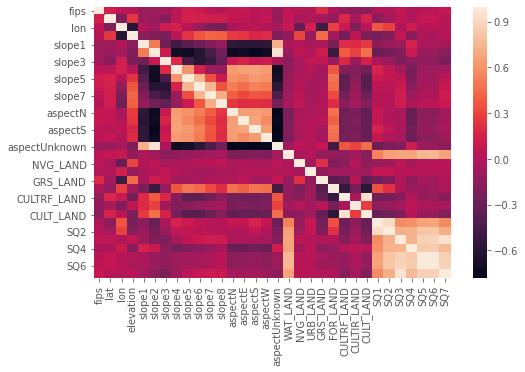

In [160]:
plt.figure(figsize=(8,5))
sns.heatmap(df.corr())

In [161]:
# I also used lasso regression to help with feature selection
# I dropped latitude and longitude to see if a model like this could be used all over the world not only the U.S
X = df.drop(['SQ1', 'SQ2', 'SQ3', 'SQ4', 'SQ5', 'SQ6', 'SQ7','fips', 'lat','lon'], axis =1)
s1 = df.SQ1
s2 = df.SQ2
s3 = df.SQ3
s4 = df.SQ4
s5 = df.SQ5
s6 = df.SQ6
s7 = df.SQ7

In [162]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, s1, test_size=0.30, random_state=42)
X_train2, X_test2, y_train2, y_test2 = train_test_split( X, s2, test_size=0.30, random_state=42)
X_train3, X_test3, y_train3, y_test3 = train_test_split( X, s3, test_size=0.30, random_state=42)
X_train4, X_test4, y_train4, y_test4 = train_test_split( X, s4, test_size=0.30, random_state=42)
X_train5, X_test5, y_train5, y_test5 = train_test_split( X, s5, test_size=0.30, random_state=42)
X_train6, X_test6, y_train6, y_test6 = train_test_split( X, s6, test_size=0.30, random_state=42)
X_train7, X_test7, y_train7, y_test7 = train_test_split( X, s7, test_size=0.30, random_state=42)

In [163]:
l1 = Lasso(alpha = 0.5)
l2 = Lasso(alpha = 0.5)
l3 = Lasso(alpha = 0.5)
l4 = Lasso(alpha = 0.5)
l5 = Lasso(alpha = 0.5)
l6 = Lasso(alpha = 0.5)
l7 = Lasso(alpha = 0.5)

In [164]:
l1.fit(X_train, y_train)
l2.fit(X_train2, y_train2)
l3.fit(X_train3, y_train3)
l4.fit(X_train4, y_train4)
l5.fit(X_train5, y_train5)
l6.fit(X_train6, y_train6)
l7.fit(X_train7, y_train7)

Lasso(alpha=0.5)

In [165]:
l1.coef_

array([-0.00031948, -0.        , -0.        ,  0.        ,  0.        ,
       -0.        , -0.        , -0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        , -0.        ,  0.04757877,
        0.        ,  0.00612866,  0.00076715,  0.01468943, -0.        ,
        0.        , -0.        ])

In [166]:
new_featuress1 = df[['elevation','WAT_LAND','URB_LAND','GRS_LAND','FOR_LAND']]
s11 = df.SQ1

In [167]:
l2.coef_

array([-0.00015219, -0.        , -0.        ,  0.        ,  0.        ,
        0.        , -0.        , -0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        , -0.        ,  0.048875  ,
        0.        ,  0.00371858,  0.00017186,  0.00917136, -0.        ,
        0.        , -0.        ])

In [168]:
new_featuress2 = df[['elevation','WAT_LAND','URB_LAND','GRS_LAND','FOR_LAND']]
s22 = df.SQ2

In [169]:
l3.coef_

array([ 0.00033515, -0.        , -0.        , -0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        , -0.        ,  0.04957864,
        0.        ,  0.        ,  0.        ,  0.00182814, -0.        ,
       -0.        , -0.00031608])

In [170]:
new_featuress3 = df[['elevation','WAT_LAND','FOR_LAND','CULT_LAND']]
s33 = df.SQ3

In [171]:
l4.coef_

array([-0.00010592,  0.        ,  0.        , -0.        , -0.        ,
       -0.        , -0.        , -0.        ,  0.        , -0.        ,
       -0.        , -0.        , -0.        ,  0.        ,  0.05002992,
        0.        ,  0.        , -0.        ,  0.00128741,  0.        ,
        0.00365182,  0.00358087])

In [172]:
new_featuress4 = df[['elevation','WAT_LAND','FOR_LAND','CULT_LAND','CULTIR_LAND']]
s44 = df.SQ4

In [173]:
l5.coef_

array([ 0.00018021, -0.        , -0.        , -0.        ,  0.        ,
       -0.        , -0.        , -0.        ,  0.        , -0.        ,
       -0.        , -0.        , -0.        , -0.        ,  0.04927961,
        0.        ,  0.        , -0.        ,  0.        ,  0.        ,
        0.        ,  0.        ])

In [174]:
new_featuress5 = df[['elevation','WAT_LAND']]
s55 = df.SQ5

In [175]:
l6.coef_

array([ 0.00012352, -0.        , -0.        , -0.        ,  0.        ,
       -0.        , -0.        ,  0.        ,  0.        , -0.        ,
       -0.        ,  0.        , -0.        , -0.        ,  0.0491805 ,
        0.        ,  0.        , -0.        ,  0.        ,  0.        ,
        0.        ,  0.        ])

In [176]:
new_featuress6 = df[['elevation','WAT_LAND']]
s66 = df.SQ6

In [177]:
l7.coef_

array([ 0.00028112, -0.        , -0.        , -0.        , -0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        , -0.        , -0.        ,  0.05029266,
        0.        ,  0.        ,  0.        ,  0.00185977, -0.        ,
       -0.        , -0.00018936])

In [178]:
## Next I used those selected features in a regression tree to see the importance of each variable compared with each target 
## variable
new_featuress7 = df[['elevation', 'WAT_LAND', 'FOR_LAND', 'CULT_LAND']]
s77 = df.SQ7

In [179]:
X_train8, X_test8, y_train8, y_test8 = train_test_split( new_featuress7, s77, test_size=0.30, random_state=42)
X_train9, X_test9, y_train9, y_test9 = train_test_split( new_featuress6, s66, test_size=0.30, random_state=42)
X_train10, X_test10, y_train10, y_test10 = train_test_split( new_featuress5, s55, test_size=0.30, random_state=42)
X_train11, X_test11, y_train11, y_test11 = train_test_split( new_featuress4, s44, test_size=0.30, random_state=42)
X_train12, X_test12, y_train12, y_test12 = train_test_split( new_featuress3, s33, test_size=0.30, random_state=42)
X_train13, X_test13, y_train13, y_test13 = train_test_split( new_featuress2, s22, test_size=0.30, random_state=42)
X_train14, X_test14, y_train14, y_test14 = train_test_split( new_featuress1, s11, test_size=0.30, random_state=42)

In [180]:
rt7 = DecisionTreeRegressor()
rt6 = DecisionTreeRegressor()
rt5 = DecisionTreeRegressor()
rt4 = DecisionTreeRegressor()
rt3 = DecisionTreeRegressor()
rt2 = DecisionTreeRegressor()
rt1 = DecisionTreeRegressor()

In [181]:
rt7.fit(new_featuress7, s77)
rt6.fit(new_featuress6, s66)
rt5.fit(new_featuress5, s55)
rt4.fit(new_featuress4, s44)
rt3.fit(new_featuress3, s33)
rt2.fit(new_featuress2, s22)
rt1.fit(new_featuress1, s11)

DecisionTreeRegressor()

In [182]:
pred7 = rt7.predict(new_featuress7)
pred6 = rt6.predict(new_featuress6)
pred5= rt5.predict(new_featuress5)
pred4 = rt4.predict(new_featuress4)
pred3 = rt3.predict(new_featuress3)
pred2 = rt2.predict(new_featuress2)
pred1 = rt1.predict(new_featuress1)

In [183]:
from sklearn.metrics import accuracy_score

In [184]:
print('SQ7 SCORE:',rt7.score(new_featuress7, s77))
print('SQ6 SCORE:',rt6.score(new_featuress6, s66))
print('SQ5 SCORE:',rt5.score(new_featuress5, s55))
print('SQ4 SCORE:',rt4.score(new_featuress4, s44))
print('SQ3 SCORE:',rt3.score(new_featuress3, s33))
print('SQ2 SCORE:',rt2.score(new_featuress2, s22))
print('SQ1 SCORE:',rt1.score(new_featuress1, s11))

SQ7 SCORE: 0.9998446002562771
SQ6 SCORE: 0.9530639521641432
SQ5 SCORE: 0.9499781214637444
SQ4 SCORE: 1.0
SQ3 SCORE: 0.9998399289076345
SQ2 SCORE: 1.0
SQ1 SCORE: 1.0


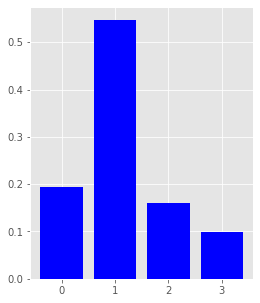

In [185]:
fig, ax = plt.subplots(figsize=(4, 5))
bar_rects = ax.bar(np.arange(4), rt7.feature_importances_, color='b')
ax.xaxis.set_xticks = np.arange(4)

In [186]:
new_featuress7.describe()

,elevation,WAT_LAND,FOR_LAND,CULT_LAND
count,3109.000000,3109.000000,3109.000000,3109.000000
mean,427.624638,2.850511,39.296586,31.999486
std,500.158880,13.159247,34.365530,33.099657
min,-1.000000,0.000000,0.000000,0.000000
25%,132.000000,0.000000,4.552230,1.602227
50%,272.000000,0.000000,30.573359,18.811279
75%,483.000000,0.000000,74.532990,60.637421
max,3561.000000,100.000000,91.044609,99.956841


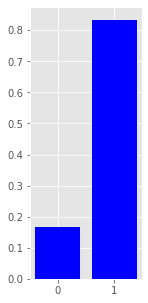

In [187]:
fig, ax = plt.subplots(figsize=(2, 5))
bar_rects = ax.bar(np.arange(2), rt6.feature_importances_, color='b')
ax.xaxis.set_ticks = np.arange(2)


In [188]:
new_featuress6.describe()

,elevation,WAT_LAND
count,3109.000000,3109.000000
mean,427.624638,2.850511
std,500.158880,13.159247
min,-1.000000,0.000000
25%,132.000000,0.000000
50%,272.000000,0.000000
75%,483.000000,0.000000
max,3561.000000,100.000000


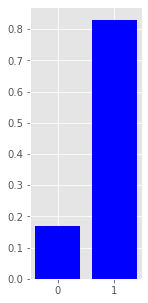

In [189]:
fig, ax = plt.subplots(figsize=(2, 5))
bar_rects = ax.bar(np.arange(2), rt5.feature_importances_, color='b')
ax.xaxis.set_ticks = np.arange(2)


In [190]:
new_featuress5.describe()

,elevation,WAT_LAND
count,3109.000000,3109.000000
mean,427.624638,2.850511
std,500.158880,13.159247
min,-1.000000,0.000000
25%,132.000000,0.000000
50%,272.000000,0.000000
75%,483.000000,0.000000
max,3561.000000,100.000000


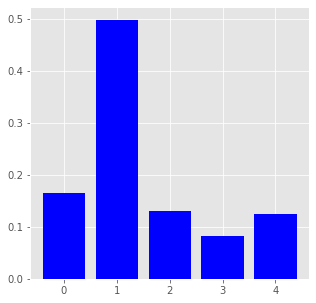

In [191]:
fig, ax = plt.subplots(figsize=(5, 5))
bar_rects = ax.bar(np.arange(5), rt4.feature_importances_, color='b')
ax.xaxis.set_ticks = np.arange(5)


In [192]:
new_featuress4.describe()

,elevation,WAT_LAND,FOR_LAND,CULT_LAND,CULTIR_LAND
count,3109.000000,3109.000000,3109.000000,3109.000000,3109.000000
mean,427.624638,2.850511,39.296586,31.999486,3.504682
std,500.158880,13.159247,34.365530,33.099657,10.290893
min,-1.000000,0.000000,0.000000,0.000000,0.000000
25%,132.000000,0.000000,4.552230,1.602227,0.045909
50%,272.000000,0.000000,30.573359,18.811279,0.276606
75%,483.000000,0.000000,74.532990,60.637421,1.370315
max,3561.000000,100.000000,91.044609,99.956841,99.956841


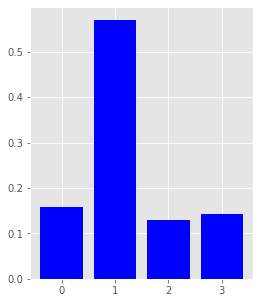

In [193]:
fig, ax = plt.subplots(figsize=(4, 5))
bar_rects = ax.bar(np.arange(4), rt3.feature_importances_, color='b')
ax.xaxis.set_ticks = np.arange(4)


In [194]:
new_featuress3.describe()

,elevation,WAT_LAND,FOR_LAND,CULT_LAND
count,3109.000000,3109.000000,3109.000000,3109.000000
mean,427.624638,2.850511,39.296586,31.999486
std,500.158880,13.159247,34.365530,33.099657
min,-1.000000,0.000000,0.000000,0.000000
25%,132.000000,0.000000,4.552230,1.602227
50%,272.000000,0.000000,30.573359,18.811279
75%,483.000000,0.000000,74.532990,60.637421
max,3561.000000,100.000000,91.044609,99.956841


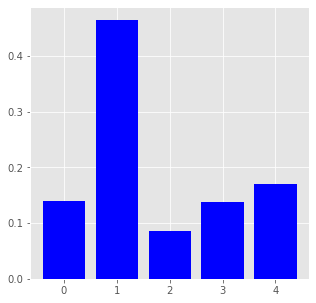

In [195]:
fig, ax = plt.subplots(figsize=(5, 5))
bar_rects = ax.bar(np.arange(5), rt2.feature_importances_, color='b')
ax.xaxis.set_ticks = np.arange(5)


In [196]:
new_featuress2.describe()

,elevation,WAT_LAND,URB_LAND,GRS_LAND,FOR_LAND
count,3109.000000,3109.000000,3109.000000,3109.000000,3109.000000
mean,427.624638,2.850511,2.670026,19.812154,39.296586
std,500.158880,13.159247,9.770693,25.447435,34.365530
min,-1.000000,0.000000,0.000000,0.000000,0.000000
25%,132.000000,0.000000,0.104800,4.360057,4.552230
50%,272.000000,0.000000,0.488500,8.839095,30.573359
75%,483.000000,0.000000,1.115100,23.720787,74.532990
max,3561.000000,100.000000,99.998764,99.998596,91.044609


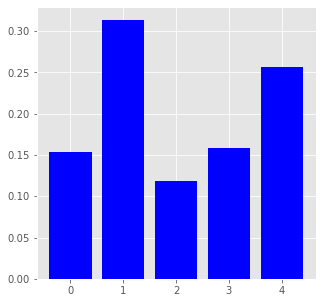

In [197]:
fig, ax = plt.subplots(figsize=(5, 5))
bar_rects = ax.bar(np.arange(5), rt1.feature_importances_, color='b')
ax.xaxis.set_ticks = np.arange(5)


In [198]:
new_featuress1.describe()

,elevation,WAT_LAND,URB_LAND,GRS_LAND,FOR_LAND
count,3109.000000,3109.000000,3109.000000,3109.000000,3109.000000
mean,427.624638,2.850511,2.670026,19.812154,39.296586
std,500.158880,13.159247,9.770693,25.447435,34.365530
min,-1.000000,0.000000,0.000000,0.000000,0.000000
25%,132.000000,0.000000,0.104800,4.360057,4.552230
50%,272.000000,0.000000,0.488500,8.839095,30.573359
75%,483.000000,0.000000,1.115100,23.720787,74.532990
max,3561.000000,100.000000,99.998764,99.998596,91.044609


In [199]:
import plotly.express as px
plt.figure(figsize=(12,12))
fig = px.scatter_3d(df, x='lat', y='lon', z='elevation',
              color='SQ1')
fig.show()

<Figure size 864x864 with 0 Axes>

In [200]:
import sklearn
from sklearn.cluster import KMeans

In [201]:
cluster = df[['WAT_LAND', 'FOR_LAND', 'GRS_LAND', 'SQ1']]

In [202]:
km = KMeans()
preds = km.fit_predict(cluster)
cluster['preds'] = preds

C:\Users\willi\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [203]:
clustersq11 = cluster[cluster['SQ1'] == 1]
clustersq12 = cluster[cluster['SQ1'] == 2]
clustersq13 = cluster[cluster['SQ1'] == 3]
clustersq14 = cluster[cluster['SQ1'] == 4]
clustersq15 = cluster[cluster['SQ1'] == 5]
clustersq16 = cluster[cluster['SQ1'] == 6]
clustersq17 = cluster[cluster['SQ1'] == 7]

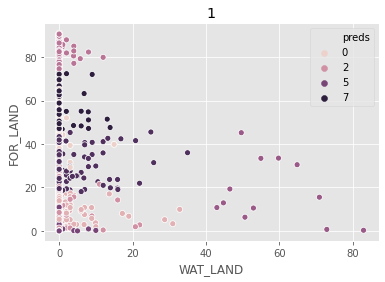

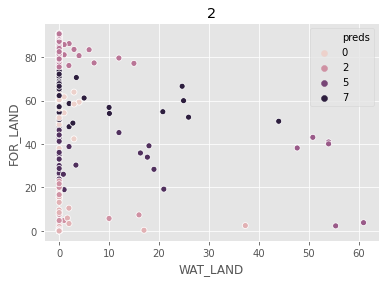

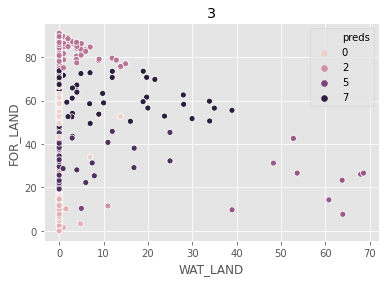

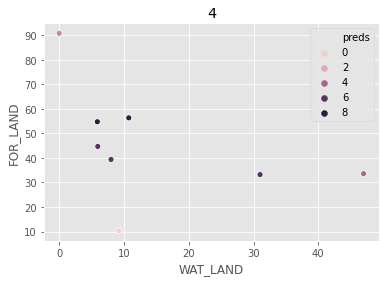

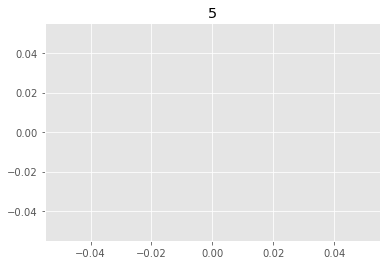

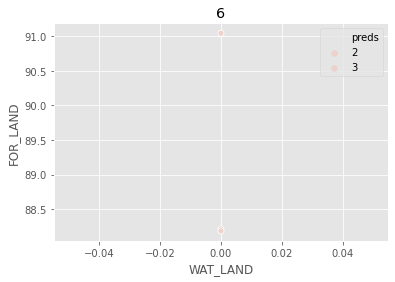

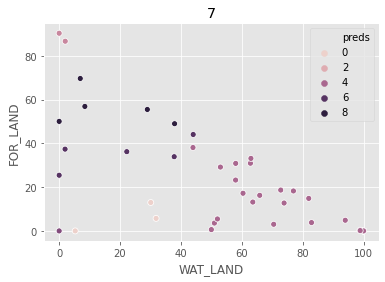

In [204]:
plt.title('1')
sns.scatterplot('WAT_LAND', 'FOR_LAND', hue='preds', data=clustersq11)
plt.show()
plt.title('2')
sns.scatterplot('WAT_LAND', 'FOR_LAND', hue='preds', data=clustersq12)
plt.show()
plt.title('3')
sns.scatterplot('WAT_LAND', 'FOR_LAND', hue='preds', data=clustersq13)
plt.show()
plt.title('4')
sns.scatterplot('WAT_LAND', 'FOR_LAND', hue='preds', data=clustersq14)
plt.show()
plt.title('5')
sns.scatterplot('WAT_LAND', 'FOR_LAND', hue='preds', data=clustersq15)
plt.show()
plt.title('6')
sns.scatterplot('WAT_LAND', 'FOR_LAND', hue='preds', data=clustersq16)
plt.show()
plt.title('7')
sns.scatterplot('WAT_LAND', 'FOR_LAND', hue='preds', data=clustersq17)
plt.show()

In [215]:
nn = df[['elevation','WAT_LAND','URB_LAND','GRS_LAND','FOR_LAND', 'CULTIR_LAND', 'CULT_LAND']]
target = df[['SQ1','SQ2','SQ3','SQ4','SQ5','SQ6','SQ7']].values

In [216]:
X_train15, X_test15, y_train15, y_test15 = train_test_split( nn,
                                                      target, test_size=0.30, random_state=42)

In [217]:
model = Sequential()

In [218]:
model.add(Dense(128, activation='relu', input_dim=X_train15.shape[1]))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(7, activation='softmax'))

In [222]:
# the highest validation accuracy I have got - 62% with 50 epochs
model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])
model.fit(X_train15, y_train15, epochs=50, validation_data=(X_test15, y_test15))

Train on 2176 samples, validate on 933 samples
Epoch 1/50
2176/2176 [==============================] - 0s 102us/step - loss: 2.5091 - accuracy: 0.5942 - val_loss: 2.4895 - val_accuracy: 0.6002
Epoch 2/50
2176/2176 [==============================] - 0s 45us/step - loss: 2.5082 - accuracy: 0.5938 - val_loss: 2.4879 - val_accuracy: 0.5841
Epoch 3/50
2176/2176 [==============================] - 0s 47us/step - loss: 2.5087 - accuracy: 0.5933 - val_loss: 2.4884 - val_accuracy: 0.5949
Epoch 4/50
2176/2176 [==============================] - 0s 44us/step - loss: 2.5087 - accuracy: 0.5859 - val_loss: 2.4881 - val_accuracy: 0.6174
Epoch 5/50
2176/2176 [==============================] - 0s 49us/step - loss: 2.5092 - accuracy: 0.5873 - val_loss: 2.4907 - val_accuracy: 0.5809
Epoch 6/50
2176/2176 [==============================] - 0s 44us/step - loss: 2.5103 - accuracy: 0.5804 - val_loss: 2.4903 - val_accuracy: 0.6066
Epoch 7/50
2176/2176 [==============================] - 0s 46us/step - loss: 2.508

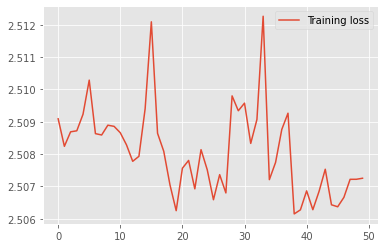

In [223]:
loss = model.history.history['loss']
plt.plot(loss, label='Training loss')
plt.legend()
plt.show()